## Data Loading

In [13]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [14]:
df = pd.read_csv('../data/Copy of BrentOilPrices.csv')

In [15]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_18848\1929082916.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [19]:
# Display data information
print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None

First few rows of the dataset:
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


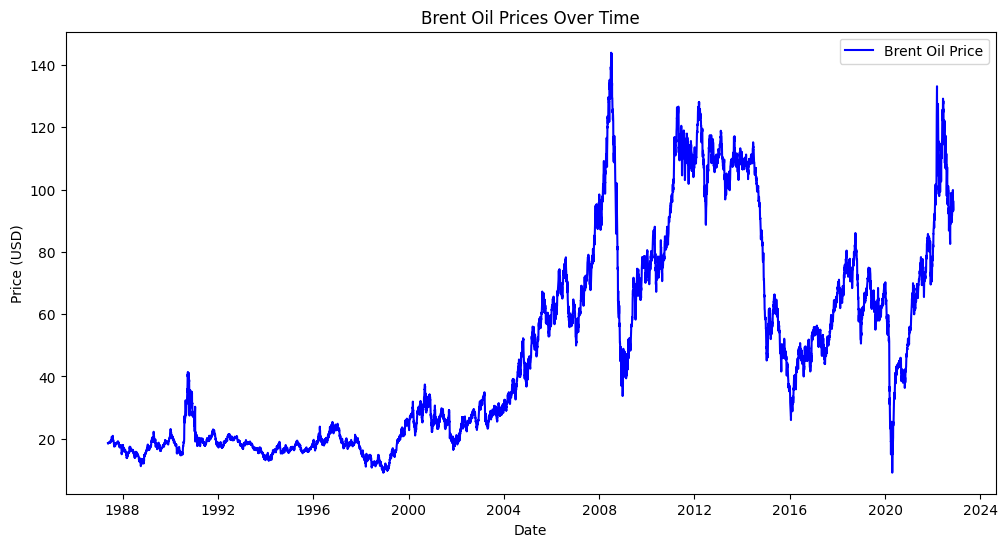

In [20]:
# Plotting the price trend over time
plt.figure(figsize=(12,6))
plt.plot(df['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


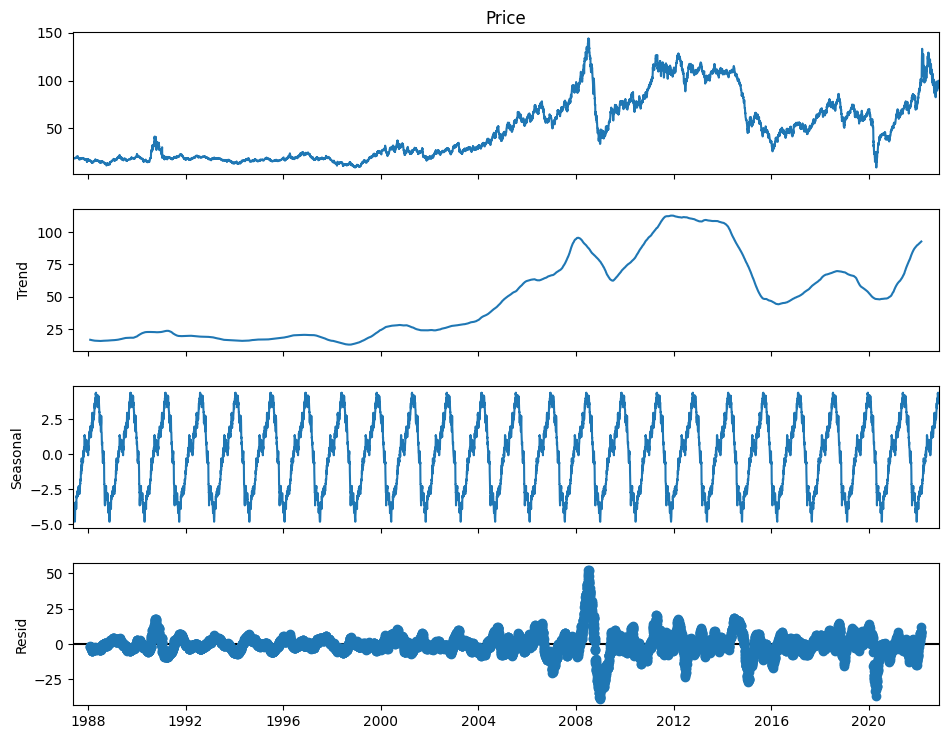

In [21]:
# Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Price'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()


In [22]:
# Augmented Dickey-Fuller (ADF) test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Data is non-stationary")
    else:
        print("Data is stationary")

# Perform ADF test on the original series
print("ADF Test for Original Data:")
adf_test(df['Price'])


ADF Test for Original Data:
ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Data is non-stationary


ADF Test after Differencing:
ADF Statistic: -15.52936758004806
p-value: 2.2307405105160745e-28
Data is stationary


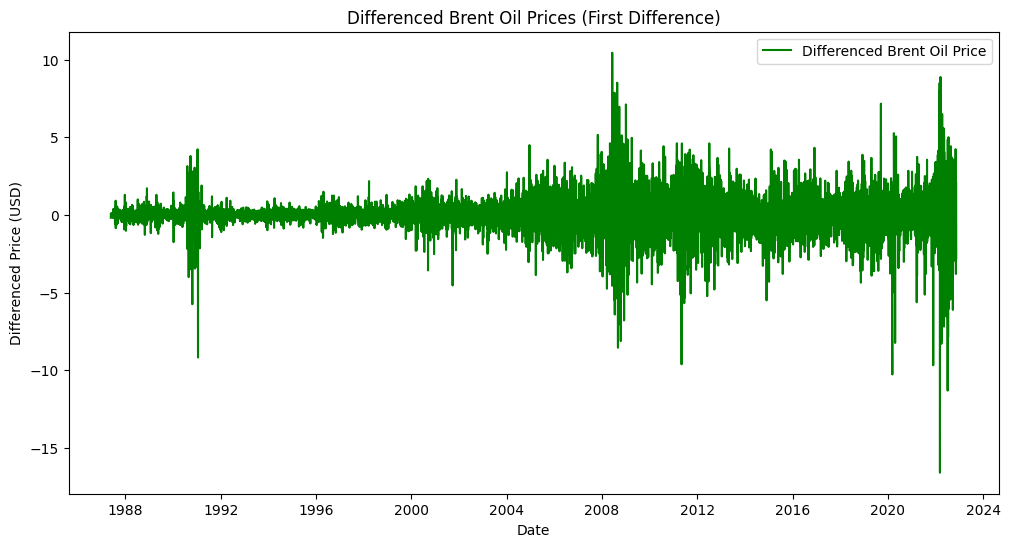

In [23]:
# Differencing to make the data stationary if needed
df['Price_diff'] = df['Price'].diff().dropna()

# ADF Test after Differencing
print("ADF Test after Differencing:")
adf_test(df['Price_diff'].dropna())

# Plot differenced series
plt.figure(figsize=(12,6))
plt.plot(df['Price_diff'], label='Differenced Brent Oil Price', color='green')
plt.title('Differenced Brent Oil Prices (First Difference)')
plt.xlabel('Date')
plt.ylabel('Differenced Price (USD)')
plt.legend()
plt.show()


In [24]:
# Fit ARIMA model on differenced data
model = ARIMA(df['Price'], order=(5,1,0))  # ARIMA(5,1,0) is a starting point; can be tuned
model_fit = model.fit()

# Model summary
print("ARIMA Model Summary:")
print(model_fit.summary())


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Sat, 02 Nov 2024   AIC                          29093.226
Time:                        13:09:42   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.00

c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


10-Day Forecast:
9011    93.392185
9012    93.470938
9013    93.536262
9014    93.477045
9015    93.476757
9016    93.479749
9017    93.481342
9018    93.479974
9019    93.480029
9020    93.480111
Name: predicted_mean, dtype: float64


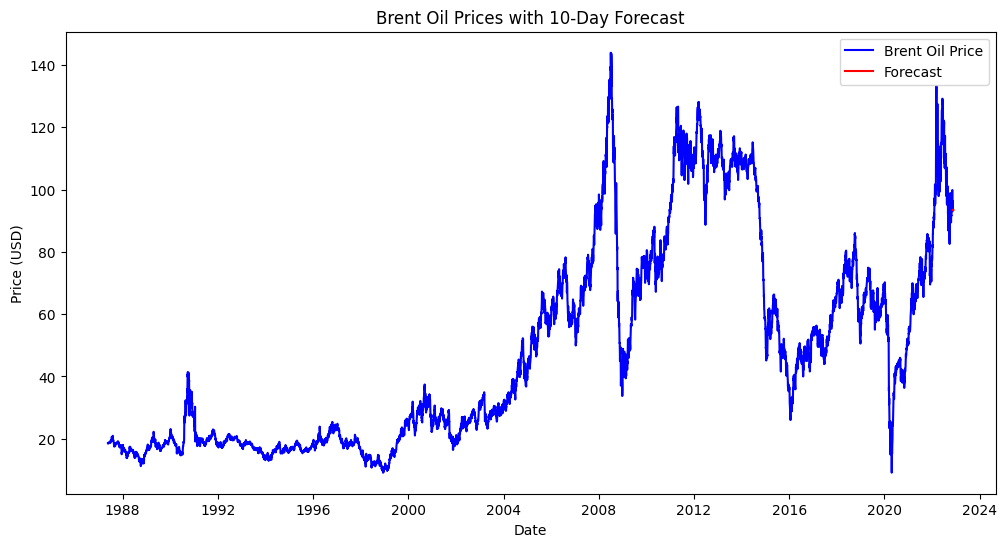

In [25]:
# Forecasting the next 10 days
forecast = model_fit.forecast(steps=10)
print("10-Day Forecast:")
print(forecast)

# Plot original data with forecast
plt.figure(figsize=(12,6))
plt.plot(df['Price'], label='Brent Oil Price', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=10, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.title('Brent Oil Prices with 10-Day Forecast')
plt.show()


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model with RMSE and MAE on the last 10 observations
actual = df['Price'][-10:]
predicted = model_fit.forecast(steps=10)
rmse = mean_squared_error(actual, predicted, squared=False)
mae = mean_absolute_error(actual, predicted)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 3.3291061463470903
MAE: 2.6098291361507906


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-10\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
